# Analyzing the effectivness of "War On Drugs" policies
### &#9989; Mihir Patel 


## INSTRUCTIONS FOR RUNNING THE NOTEBOOK
This section should describe how to run this notebook and provide links/instructions to additional files. For example.

- The dataset used in this project is freely available at https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f#sec-dates. The name of the file to download is `Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv` and can be found by scrolling down and downloading the csv file. The files should be downloaded in the same folder as this notebook and be renamed as `Drug_Overdose_Deathrates.csv`

- All python libraries I use in the notebook were all used in class so no need to install anyother ones.

# ___Investigating the effectivness of the "War On Drugs" Policies___

## Background and Motivation

During the late 1800's, America had witnessed its first drug crisis [1]. Many housewives, doctors, and many other civil war veterans all feel vitcim to america's first opdiod crisis during this era. Following this period, came the government first attempts to regulate the use of certain drugs. For example, Pennsylvania's state government passed a law, completley banning the use of any morphines in 1860. In 1875, the city counil for the san fransico had passed the same type of law, but stricily enforced. If caught, Violators would face heavy fines, and long imprisionment times for visiting these so called, "opium dens." [1]

Fastforward to feburary of 1909 came the first every federal government attempts to stop the use of opiods for non-medicinal purposes [2]. However, as time progressed, America was introduced to serveal new, and extremley dangerous drugs from other countries. This led to a lot of Americans turning to them, and becoming addicted to them. Many of these addicited americans were young teenagers. So, middles aged americans, who were parents, started to fight and protest for harsher drug enforcement on dealers that preyed on the young generation for money. This led to many politicians advocating for more and more drug enforcement, leading policy makers entire agendas to be focused soley on punishing drug dealers and addicts. 

The policy, "War on drugs", as it is commonly named, was introduced by President nixon [2]. This type of approach introduced huge punishments and federal goverment oversight into punishing drug addicts and dealers. This policy apporach created the DEA, imposed striciter federal prison time, and allowed the federal government more power to prosecute these types of crimes. It was widley belived that if you jail an addict or show people the punishment of getting caught with drugs, people will stay away from the drugs, and hopefully, decreasing the death rate. 

My main motivation for picking this topic was because I personally know some people who have had issues with drugs, specifcally fentnyl. However, they have recovered and are back on the better path, but I still want to research to see the other part of america that have gone down this road and have unfortunletley lot their lives to it.

The question is, however, __Was this policy apporach effective in decreasing death rates and which substances/drugs have affected our communities the most?__

To answer this question, I have obtained a dataset from the US Department of Health and Huamn Services on death rates from drugs spanning from the years: 1999 - 2018 [3]. This dataset gives data on death's resulting from the All drugs, opiods, heroin, methadone, semisytnehtic opiods, and synthetic opiods. From this dataset, im hoping to utilize different data visualizations to test of the efficacy of this policy by looking at trends present in the death rates of various age ranges for each types of drugs over the years. 


## Methodology

The primary source for our dataset was obtained from the US Department of Health and Human Services. The dataset contains data on drug overdose death rates spanning between the years 1999-2018.The dataset also contains data on which drugs led to certain percentages of the deathrate and also race and gender. Importing all of our nessecary libraries in order to preform the nessecary investigations on the death rates and how they have faired so far. 

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns


THe first step is to create a pandas dataframe named `Data`. With that dataframe, see how all of the columns are named, and what data is present. This will give me an idea of how I can start to approach our analysis on this data in order to solve our question and then eventually, predict and model how this epidemic will continue in the next 20 years. 

In [45]:
"""
The following program reads in he data from the csv file and stores it in a dataframe called "data"

-Then it prints out the first 5 rows of the data 
-Then it also outputs the summary statistics of the data

"""
data = pd.read_csv('Drug_OverDose_Deathrates.csv')

print(data.head())

data.describe()

                   INDICATOR                     PANEL  PANEL_NUM  \
0  Drug overdose death rates  All drug overdose deaths          0   
1  Drug overdose death rates  All drug overdose deaths          0   
2  Drug overdose death rates  All drug overdose deaths          0   
3  Drug overdose death rates  All drug overdose deaths          0   
4  Drug overdose death rates  All drug overdose deaths          0   

                                                UNIT  UNIT_NUM STUB_NAME  \
0  Deaths per 100,000 resident population, age-ad...         1     Total   
1  Deaths per 100,000 resident population, age-ad...         1     Total   
2  Deaths per 100,000 resident population, age-ad...         1     Total   
3  Deaths per 100,000 resident population, age-ad...         1     Total   
4  Deaths per 100,000 resident population, age-ad...         1     Total   

   STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
0              0  All persons             0.1  1999  

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


Now, I will preform our preliminary investigation to get an idea of how the death rates from drug overdoses were overall from the years 1999-2018. I will also preform linear regression on our data to help us see the general trend of how the overall drug overdose death rates have been moving ever since the implementation of harsh punishments on drug addicts. This will help us to see later on how I should approach prediciting the future rates.

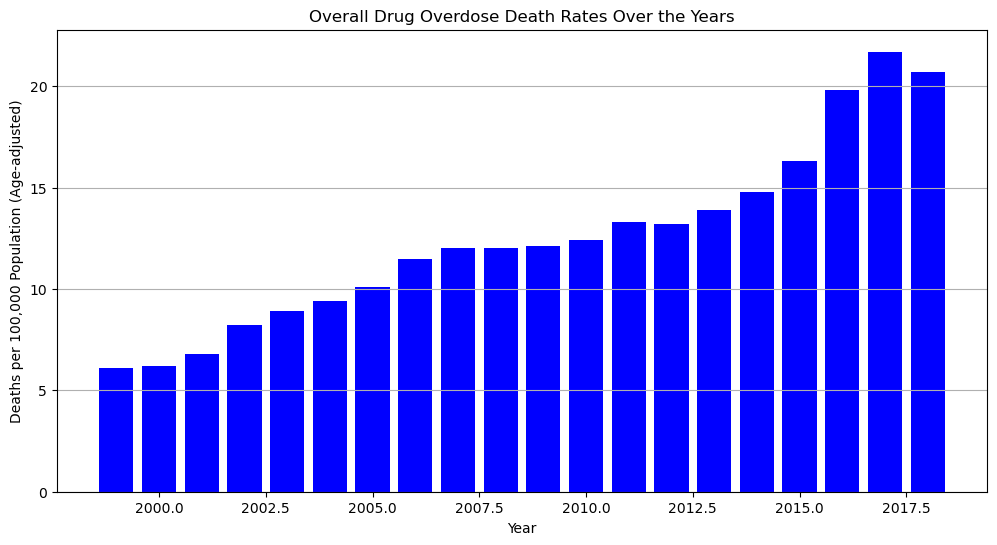

In [46]:
#Docstring below from Chatgpt 4
#Date accessed: April 12th, 2024 
#Prompt: Plugged in the code made and asked to come up with docstring 
"""
    Reads in a dataset from a CSV file named 'Drug_OverDose_Deathrates.csv' and processes it to analyze and visualize the 
    total drug overdose death rates over the years.

    The plot includes:
    - A blue bar graph representing the yearly death rates per 100,000 residents.

    Key components of the visualization include:
    - X-axis labeled as 'Year', representing the years included in the dataset.
    - Y-axis labeled as 'Deaths per 100,000 resident population'
    - A grid on the y-axis for better readability. 
"""


#Set the labels for the graphs
y_label = 'Deaths per 100,000 resident population'
x_label = 'Year'

#Takes the data and groups it by year and then sums the deaths
#This will give us the yearly death rates
#We will use this data to plot the yearly death rates


# Filtering the data for the overall drug overdose deaths
all_drug_overdoses = data[data['PANEL'] == 'All drug overdose deaths']

#Further filtering it down since the dataset accounts for all genders and ages 
all_persons_overdoses = all_drug_overdoses[all_drug_overdoses['STUB_LABEL'] == 'All persons']



# Plotting the overall drug overdose deaths over time
plt.figure(figsize=(12, 6))
plt.bar(all_persons_overdoses['YEAR'], all_persons_overdoses['ESTIMATE'], color='blue')
plt.title('Overall Drug Overdose Death Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 Population (Age-adjusted)')
plt.grid(True, axis='y')
plt.show()





This plot shows us that there has been an increase in the death rates. We can also see that this data will not acuratley fit an linear model. Instead, it looks to be more exponenetial so a polynomial function such as cubic model. I will do this later on once my analysis on the data is done

The next step for us will be to see which age ranges have been given to use by our dataset by printing out the unique values in our `Age` Columns within our dataset.

In [48]:
"""
    -This code takes the pandas dataframe and finds all of the age ranges in the dataset
    -This will be used to plot out the different death rates for each of the age ranges

"""
print('The age ranges in the dataset are:', data['AGE'].unique())

The age ranges in the dataset are: ['All ages' 'Under 15 years' '15-24 years' '25-34 years' '35-44 years'
 '45-54 years' '55-64 years' '65-74 years' '75-84 years'
 '85 years and over']


The next step is to now plot out the different death rates for each age range. To do this, we must first find all of the unique age ranges given in the dataset and then plot the death rates associated with those age ranges in the given timespan

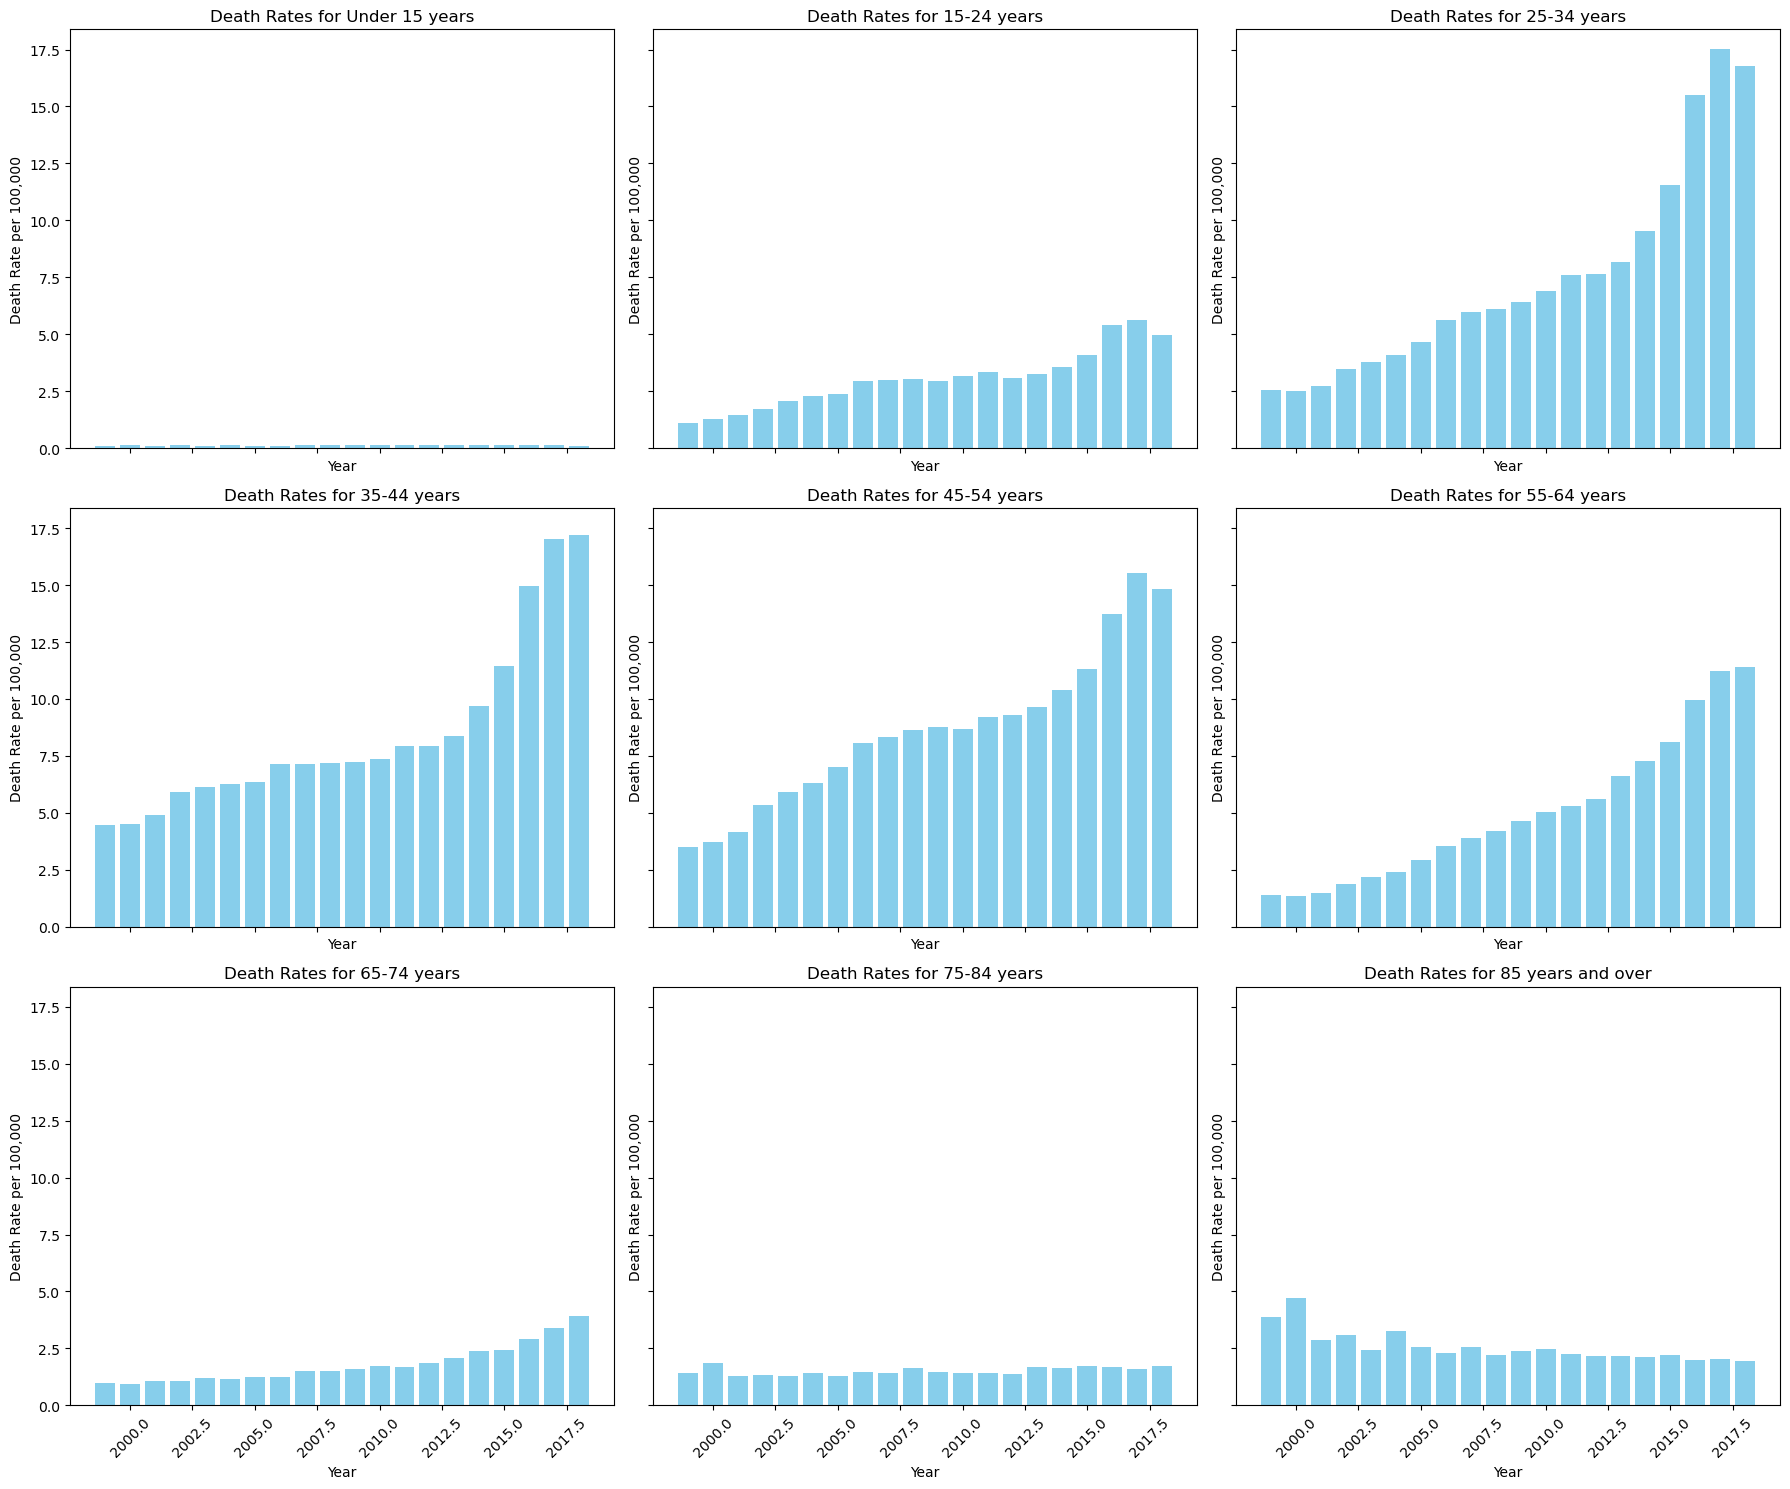

In [49]:
#Code below was devolped in collobrqation with Chatgpt 
#Version: Chaptgpt4
#Prompt: Help me loop through a co|umn of unique values and plot them in a bar chart?

#Code below essentially loops through the unique values in the 'AGE' column
#Then takes the death rates for each age group and plots them as a bar chart


# Filter out 'All ages' and create bar charts for each specific age group
age_groups = data['AGE'].unique()
age_groups = age_groups[age_groups != 'All ages']  # Exclude 'All ages'

# Setting up the plot area
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to index directly

# Plotting separate bar charts for each age group
for i, age_group in enumerate(age_groups):
    age_data = data[data['AGE'] == age_group]
    yearly_data = age_data.groupby('YEAR')['ESTIMATE'].mean()
    axes[i].bar(yearly_data.index, yearly_data.values, color='skyblue')
    axes[i].set_title(f'Death Rates for {age_group}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Death Rate per 100,000')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()


These graphs show an increase in the overall overdose death rate in a majority of the age ranges given within the dataset. These graphs to seem to be fitting a polynomial shape, so this further confirms that we should attempt to fit our data using a polynomial regression model. The next part will be to unpack the different drug compunds for each year and see how they have changed in terms of how much of the total percentage they made up of the total drug overdose death rate in the United States. To achieve this, we must first see which drugs types are present within the dataset

In [6]:
#Give us the 
print('The drugs in the dataset are:', data['PANEL'].unique())

The drugs in the dataset are: ['All drug overdose deaths' 'Drug overdose deaths involving any opioid'
 'Drug overdose deaths involving natural and semisynthetic opioids'
 'Drug overdose deaths involving methadone'
 'Drug overdose deaths involving other synthetic opioids (other than methadone)'
 'Drug overdose deaths involving heroin']


Next step, we should create a filtered dataframe that only contains the categories we are intrested in. In this case, `All drug overdose deaths` and `Drug overdose deaths involving any opiods` should be left out since these drugs are to broad and cover many of the other drugs in this list. After filtering, then we can create an aggreagte data and then create a loop to extract the data and create a heatmap. 

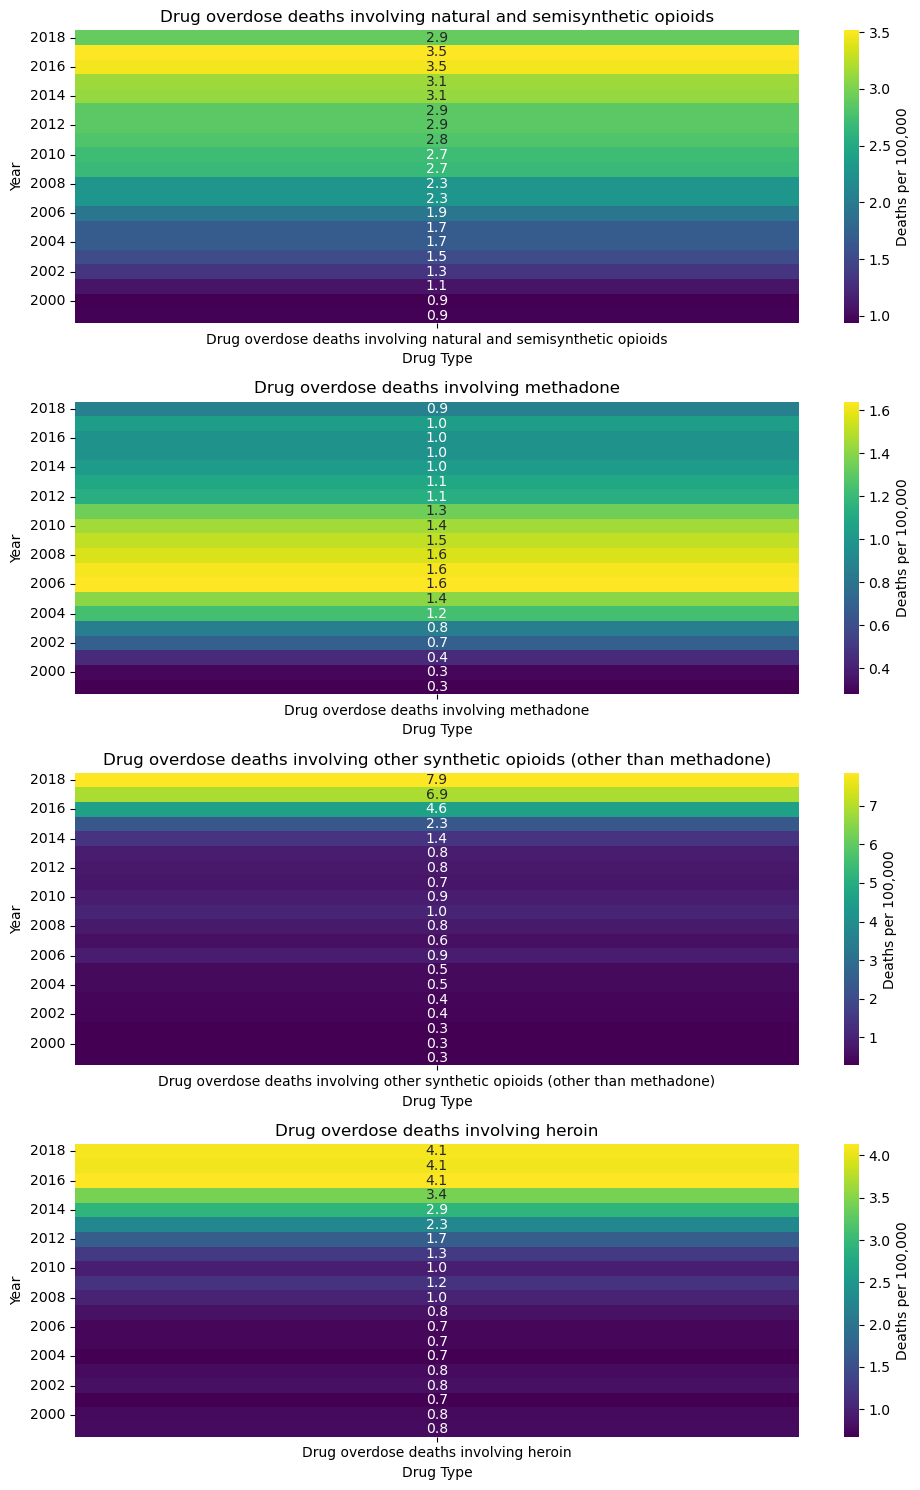

In [50]:

#Code below create 4 different hatmaps for specific drug types death rates per 100,000 people

# Filter the data for specific drug types
specific_drug_types = [
    'Drug overdose deaths involving natural and semisynthetic opioids',
    'Drug overdose deaths involving methadone',
    'Drug overdose deaths involving other synthetic opioids (other than methadone)',
    'Drug overdose deaths involving heroin'
]

# Further filter the data for "All ages"
all_ages_data = data[data['AGE'] == 'All ages']
specific_drugs_data = all_ages_data[all_ages_data['PANEL'].isin(specific_drug_types)]

# Aggregate the data to avoid duplicates and prepare for heatmap
aggregated_data = specific_drugs_data.groupby(['PANEL', 'YEAR']).agg({'ESTIMATE': 'mean'}).reset_index()

# Create the heatmaps for the specific drug types
fig, axes = plt.subplots(nrows=len(specific_drug_types), ncols=1, figsize=(10, 15))

#Code below created in collaboration with Chatgpt
#Version: Chatgpt4
#Date accessed: April 12th, 2024
#prompt: How can I loop through a list of drug types and create a heatmap for each one?
for i, drug in enumerate(specific_drug_types):
    # Extract data for this specific drug type
    drug_data = aggregated_data[aggregated_data['PANEL'] == drug]
    
    # Creates the pivot table for heatmap
    heatmap_data = drug_data.pivot_table(index='YEAR', columns='PANEL', values='ESTIMATE', aggfunc='mean')
    
    # Reverse the year order for the heatmap (most recent year at the top)
    heatmap_data = heatmap_data.iloc[::-1]
    
    # Create heatmap
    sns.heatmap(heatmap_data, ax=axes[i], cmap="viridis", annot=True, fmt=".1f", cbar_kws={'label': 'Deaths per 100,000'})
    axes[i].set_title(drug)
    axes[i].set_ylabel("Year")
    axes[i].set_xlabel("Drug Type")

plt.tight_layout()
plt.show()


These heatmaps show which drug has claimed the most amount of death in the given years. Now our next steps should be all centerned around modeling and prediciting the future rates of drug overdosing by taking into acount how our given data looked like. First plot the total overall overdose data, then observe and predict mathmatical model would it fit. 

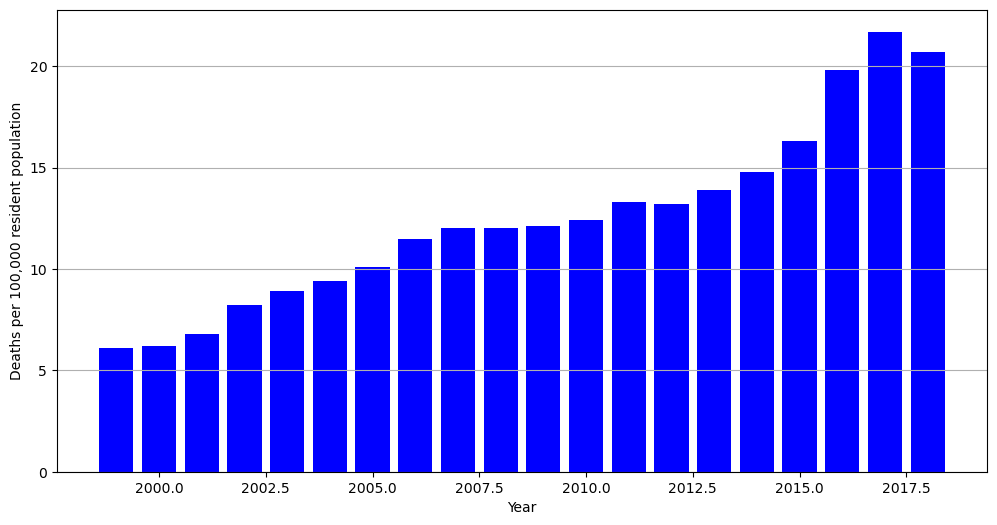

In [51]:
y_label = 'Deaths per 100,000 resident population'
x_label = 'Year'

#Takes the data and groups it by year and then sums the deaths
#This will give us the yearly death rates
#We will use this data to plot the yearly death rates
# Filtering the data for the overall drug overdose deaths
all_drug_overdoses = data[data['PANEL'] == 'All drug overdose deaths']

#Further filter down sicne the dataset accounts for all genders and ages and races 
all_persons_overdoses = data[data['STUB_LABEL'] == 'All persons']


#Plots the data for all drugs death rates over time
plt.figure(figsize=(12, 6))
#Plots the data as a bar graph
plt.bar(all_persons_overdoses['YEAR'], all_persons_overdoses['ESTIMATE'], color='blue')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True, axis='y')

Off of this result, we can clearly see if dosen't fit a linear model, however, it can replicate an polynomial mathmatical model. Lets first try a cubic model and calcualte our RMSE to see if it is a good model to use.

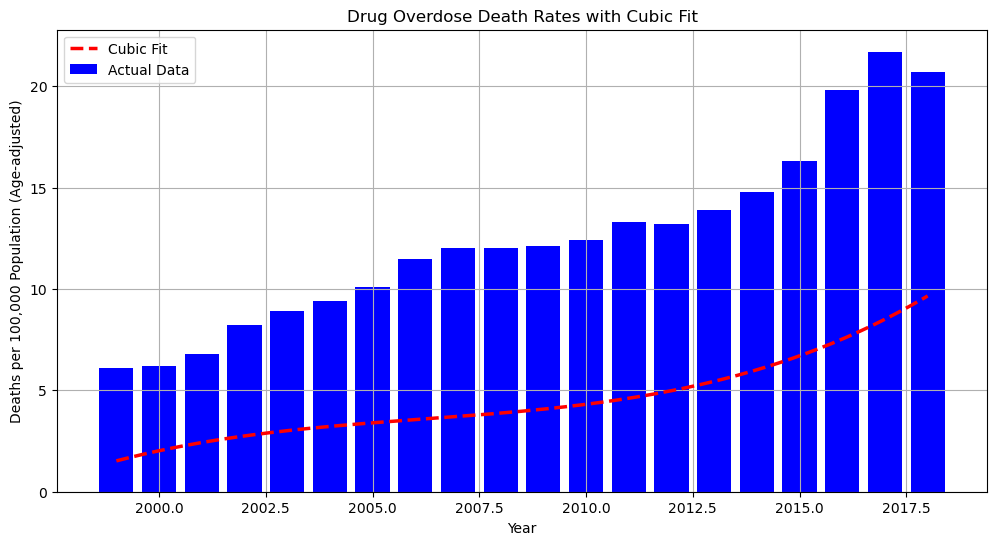

In [52]:


# Define the cubic equation function as described

def cubic_eq(x, a, b, c, d, e):
    """
    Calculate the value of a cubic equation y = a + b*x + c * x^2 + d * x^3.

    Args:
        x (float): The value of the independent variable.
        a (float): Coefficient of the bias term.
        b (float): Ceofficient of the linear term.
        c (float): Coefficient of the quadratic term.
        d (float): Coefficient of the cubic term.

    Returns:
        float: The value of the cubic equation, evaluated at the given x.

    """
    return a + b*x + c*x**2 + d*x**3 + e*x**4

# Assuming all_persons_overdoses has the correct data as previously defined:
x = all_persons_overdoses['YEAR'].values
y = all_persons_overdoses['ESTIMATE'].values

#Preidciting the parameters using our curve_fit function 
params, covarience = curve_fit(cubic_eq, x, y)

# Calculate the predicted y values from the cubic equation using the original x data
y_pred_cubic = cubic_eq(x, *params)

# Create an array of x values for plotting the fitted curve
x_fit = np.linspace(min(x), max(x), len(x))  # Smoothness of curve depends on the number of points
y_cubic_fit = cubic_eq(x_fit, *params)  

# Plotting the bar graph and the cubic fit
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue', width=0.8, label='Actual Data', align="center")
plt.plot(x_fit, y_cubic_fit, 'r--', linewidth=2.5, label='Cubic Fit')
plt.title('Drug Overdose Death Rates with Cubic Fit')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 Population (Age-adjusted)')
plt.legend()
plt.grid(True)
plt.show()

After using creating this model, we can utilize it to predict the trend for the death rate over the next 20 years. This will help us determine how the death rate will go if the currrent conditions still continue on.

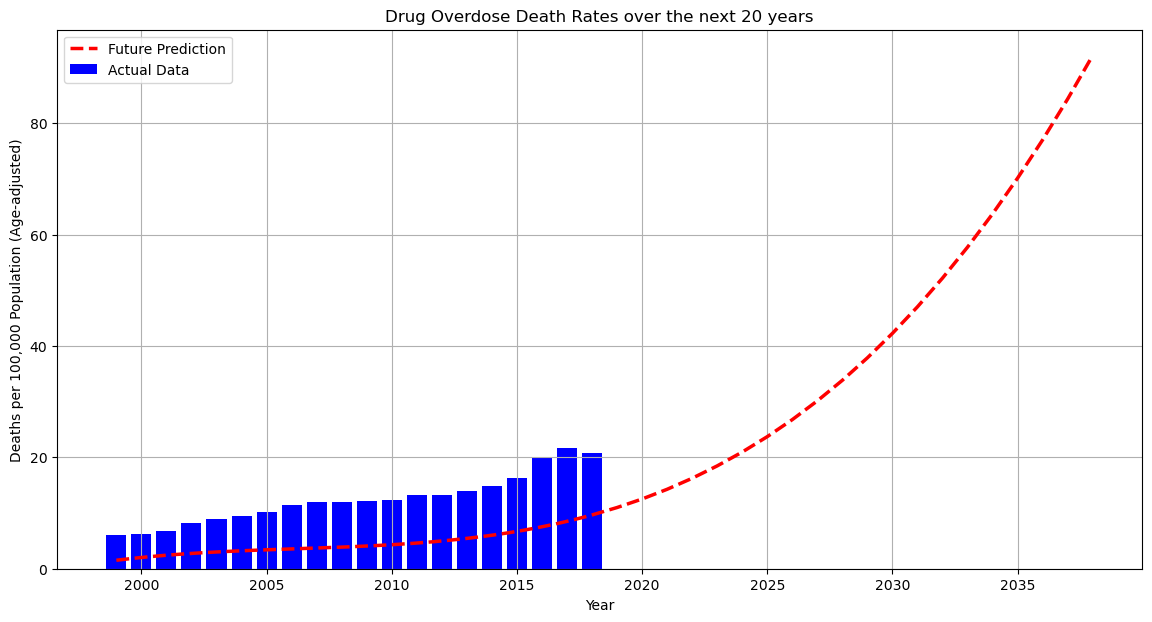

In [70]:
# Extend the x values for the next 20 years to help set the x axis 
x_future = np.arange(max(x) + 1, max(x) + 21)

# Calculate the predicted y values for the future years using the model we made 
y_future = cubic_eq(x_future, *params)

# Combine the existing x values and the future x values for plotting the combined values 
x_combined = np.concatenate((x, x_future))
y_combined = np.concatenate((y_pred_cubic, y_future))

# Create a combined array of x values for the existing and future years
x_all = np.concatenate((x_fit, x_future))

# Calculate the y values for the combined x values
y_all = cubic_eq(x_all, *params)

# Plot the existing data, the fit, and the future predictions
plt.figure(figsize=(14, 7))
plt.bar(x, y, color='blue', width=0.8, label='Actual Data', align="center")
plt.plot(x_all, y_all, 'r--', linewidth=2.5, label='Future Prediction')
plt.title('Drug Overdose Death Rates over the next 20 years')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 Population (Age-adjusted)')
plt.legend()
plt.grid(True)
plt.show()


Now, we will find the R^2 value to determine and evalute the fitting of our model to our data and also find our RMSE value. First we must define our function to find the rmse and the r^2 values and then plug in our data into the function parameteres in order to find the proper values needed. By finding these two value can we know if we can trust our model or not when it comes to predicting the rate over the next 20 years

In [53]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE).

    Parameters:
    - y_true: array-like, true target values.
    - y_pred: array-like, predicted target values by the regression model.

    Returns:
    - Root Mean Squared Error value.
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

def calculate_r_squared(y_true, y_pred):
    """
    Calculate R-squared score.

    Parameters:
    - y_true: array-like, true target values.
    - y_pred: array-like, predicted target values by the regression model.

    Returns:
    - R-squared value.
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


# Calculate the predicted y values from the cubic equation using the original x data
# Calculate the R-squared value and RMSE using your functions
# Recalculate the R-squared and RMSE using the correct y_pred
r_squared_cubic = calculate_r_squared(y, y_pred_cubic)
rmse_cubic = calculate_rmse(y, y_pred_cubic)

print("R-squared for cubic fit:", r_squared_cubic)
print("RMSE for cubic fit:", rmse_cubic)



R-squared for cubic fit: 0.1908000935382952
RMSE for cubic fit: 4.356144644115418


Based off of our obtained numbers, we can see our r^2 value, which is 19 which means our model doesent really fit our data that well. This makes sense as our curve_fitting model has our line in the middle of the bar graphs instead of giving reltivley close values towards the top of the bar's themselves. Our RMSE value tells us that our model is off by 4.35 deaths from the actual death rate and therefore, our model cannot be used to predict the estimated future model nor be trusted.

## Results

Lets first visualize and analyze the overall death rates from the years 1999 - 2018. 

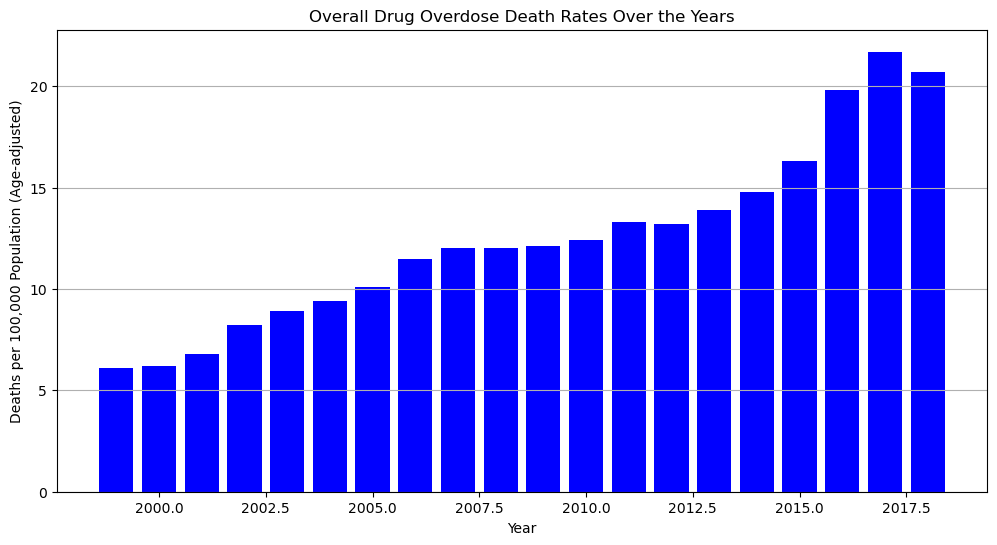

In [77]:
#Read in the csv file and load in the dataset
data = pd.read_csv('Drug_OverDose_Deathrates.csv')


#Set the labels for the graphs
y_label = 'Deaths per 100,000 resident population'
x_label = 'Year'

#Takes the data and groups it by year and then sums the deaths
#This will give us the yearly death rates
#We will use this data to plot the yearly death rates
# Filtering the data for the overall drug overdose deaths
all_drug_overdoses = data[data['PANEL'] == 'All drug overdose deaths']

all_persons_overdoses = data[data['STUB_LABEL'] == 'All persons']

x = all_persons_overdoses['YEAR'].values
y = all_persons_overdoses['ESTIMATE'].values

# Plotting the overall drug overdose deaths over time
plt.figure(figsize=(12, 6))
plt.bar(x,y, color='blue')
plt.title('Overall Drug Overdose Death Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 Population (Age-adjusted)')
plt.grid(True, axis='y')
plt.show()


From this Bar graph obtained, which shows the overall drug overdose death rate from 1999 - 2018, one can conclude that these years have seen an exponentially raise in its drug overdose death rates. Overall, from this graph, one can deduce that so far, all we have seen is an increase in deaths. From our calcualted percentage increase in deaths, we see a staggering 534 percent increase in deaths from the past 2 decades, which is astronomical and should be alarming. 

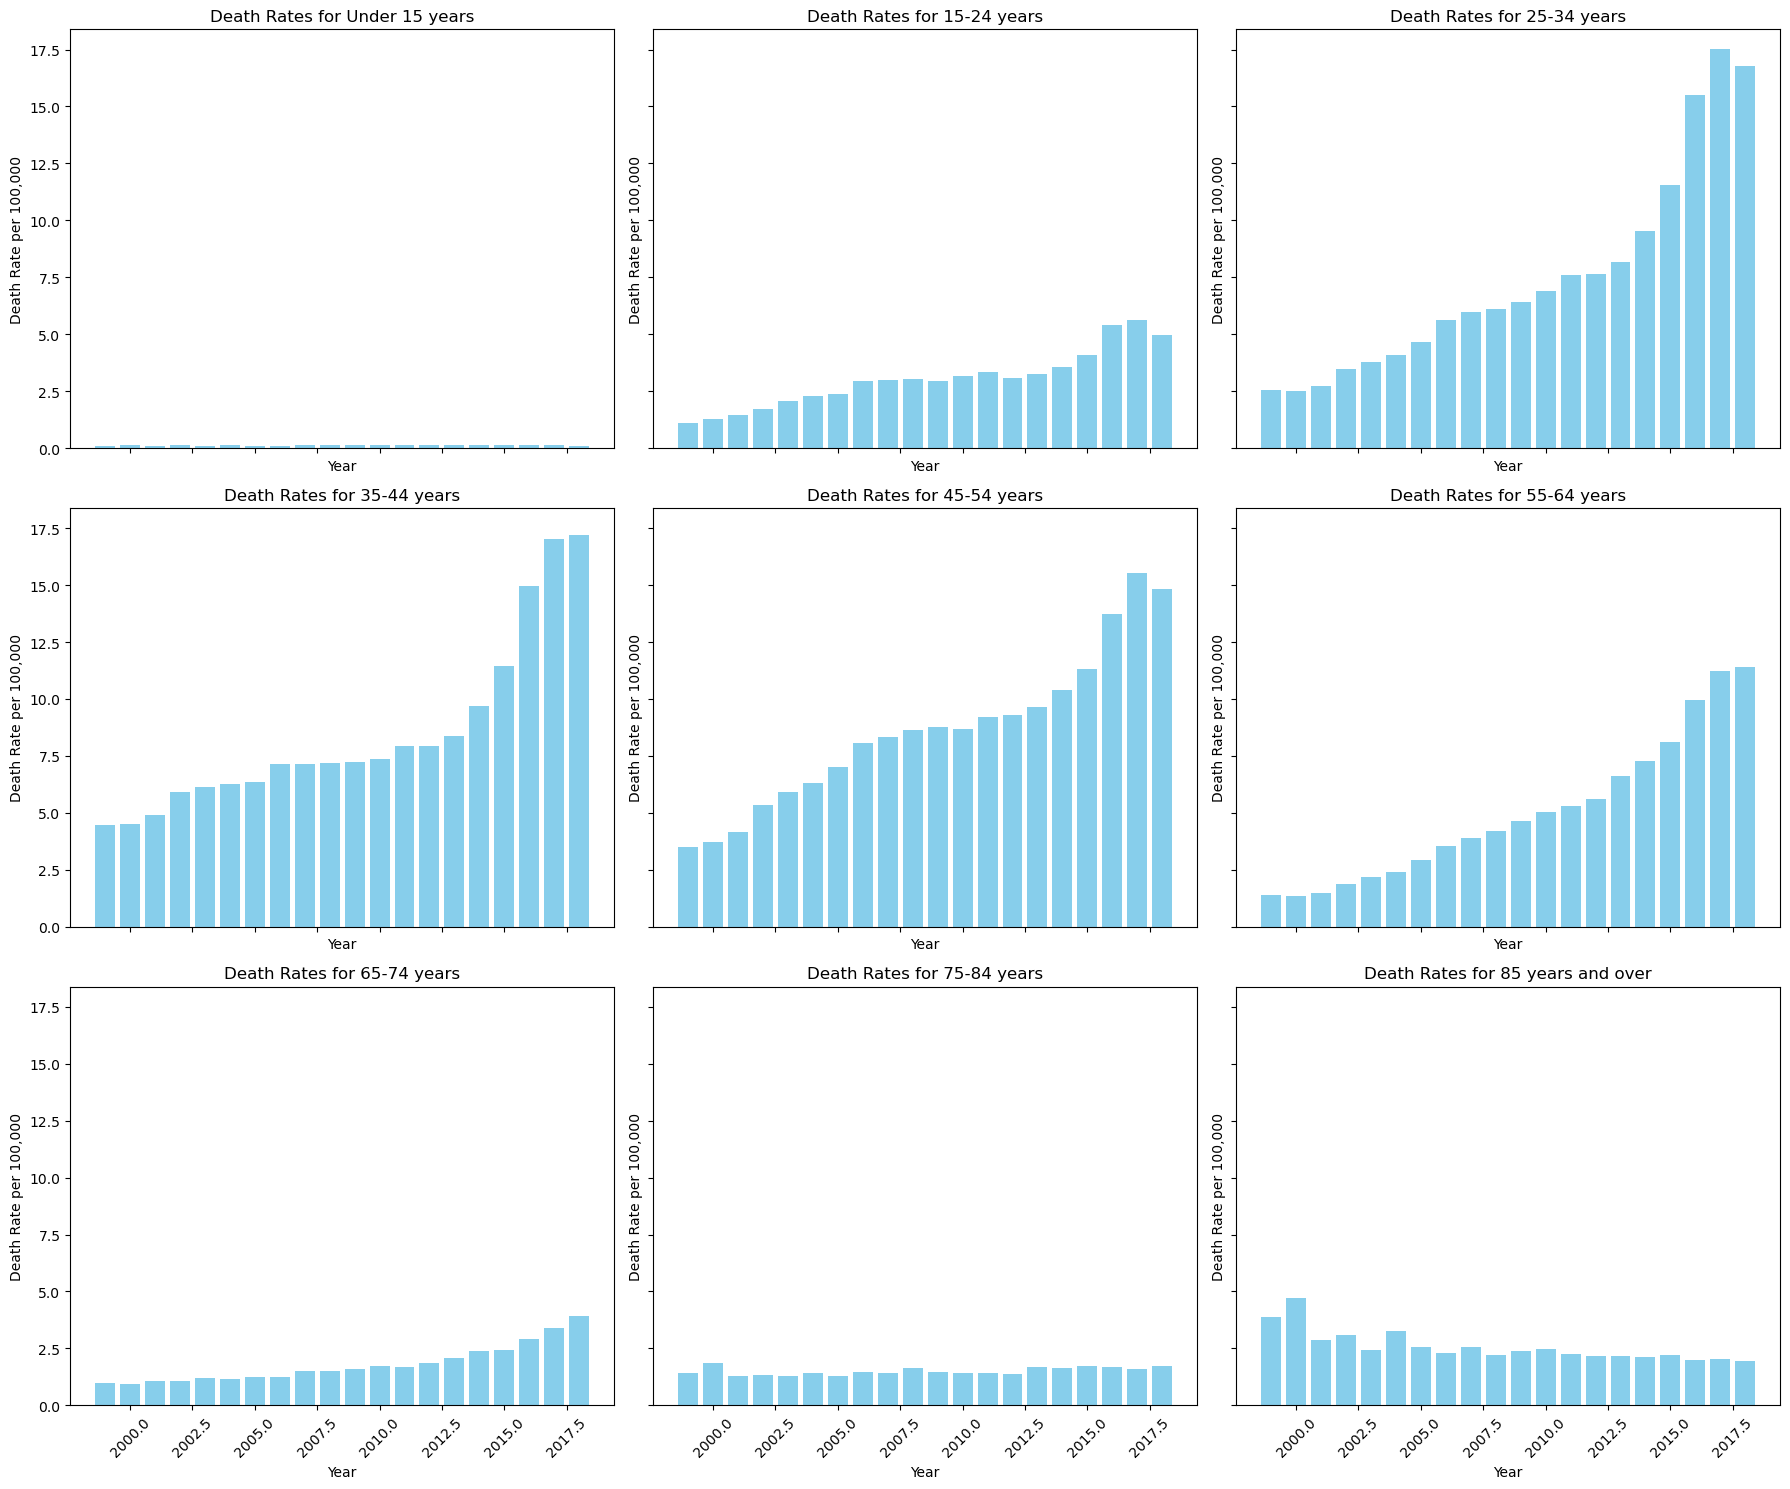

In [78]:
# Filter out 'All ages' and create bar charts for each specific age group
age_groups = data['AGE'].unique()
age_groups = age_groups[age_groups != 'All ages']  # Exclude 'All ages'

# Setting up the plot area
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to index directly

# Plotting separate bar charts for each age group
for i, age_group in enumerate(age_groups):
    age_data = data[data['AGE'] == age_group]
    yearly_data = age_data.groupby('YEAR')['ESTIMATE'].mean()
    axes[i].bar(yearly_data.index, yearly_data.values, color='skyblue')
    axes[i].set_title(f'Death Rates for {age_group}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Death Rate per 100,000')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()


In this bar graph obtained, each plot shows the death rates from drug overdosing for each of the age ranges provided in the dataset. What one can observe is majortiy of people of all ages suffered from some sort of overodsing on an durg substance. However, one can make an notable observation of certain age ranges/groups having an exponential increase in its death rates. The primary two age ranges are: (25-34) and (35 - 44). 

The races in the dataset are: ['All persons' 'Male' 'Female' 'Male: White'
 'Male: Black or African American'
 'Male: American Indian or Alaska Native'
 'Male: Asian or Pacific Islander' 'Female: White'
 'Female: Black or African American'
 'Female: American Indian or Alaska Native'
 'Female: Asian or Pacific Islander' 'Male: Hispanic or Latino: All races'
 'Male: Not Hispanic or Latino: White'
 'Male: Not Hispanic or Latino: Black'
 'Male: Not Hispanic or Latino: American Indian or Alaska Native'
 'Male: Not Hispanic or Latino: Asian or Pacific Islander'
 'Female: Hispanic or Latino: All races'
 'Female: Not Hispanic or Latino: White'
 'Female: Not Hispanic or Latino: Black'
 'Female: Not Hispanic or Latino: American Indian or Alaska Native'
 'Female: Not Hispanic or Latino: Asian or Pacific Islander'
 'Under 15 years' '15-24 years' '25-34 years' '35-44 years' '45-54 years'
 '55-64 years' '65-74 years' '75-84 years' '85 years and over'
 'Male: Under 15 years' 'Male: 15-24 years' 'Male

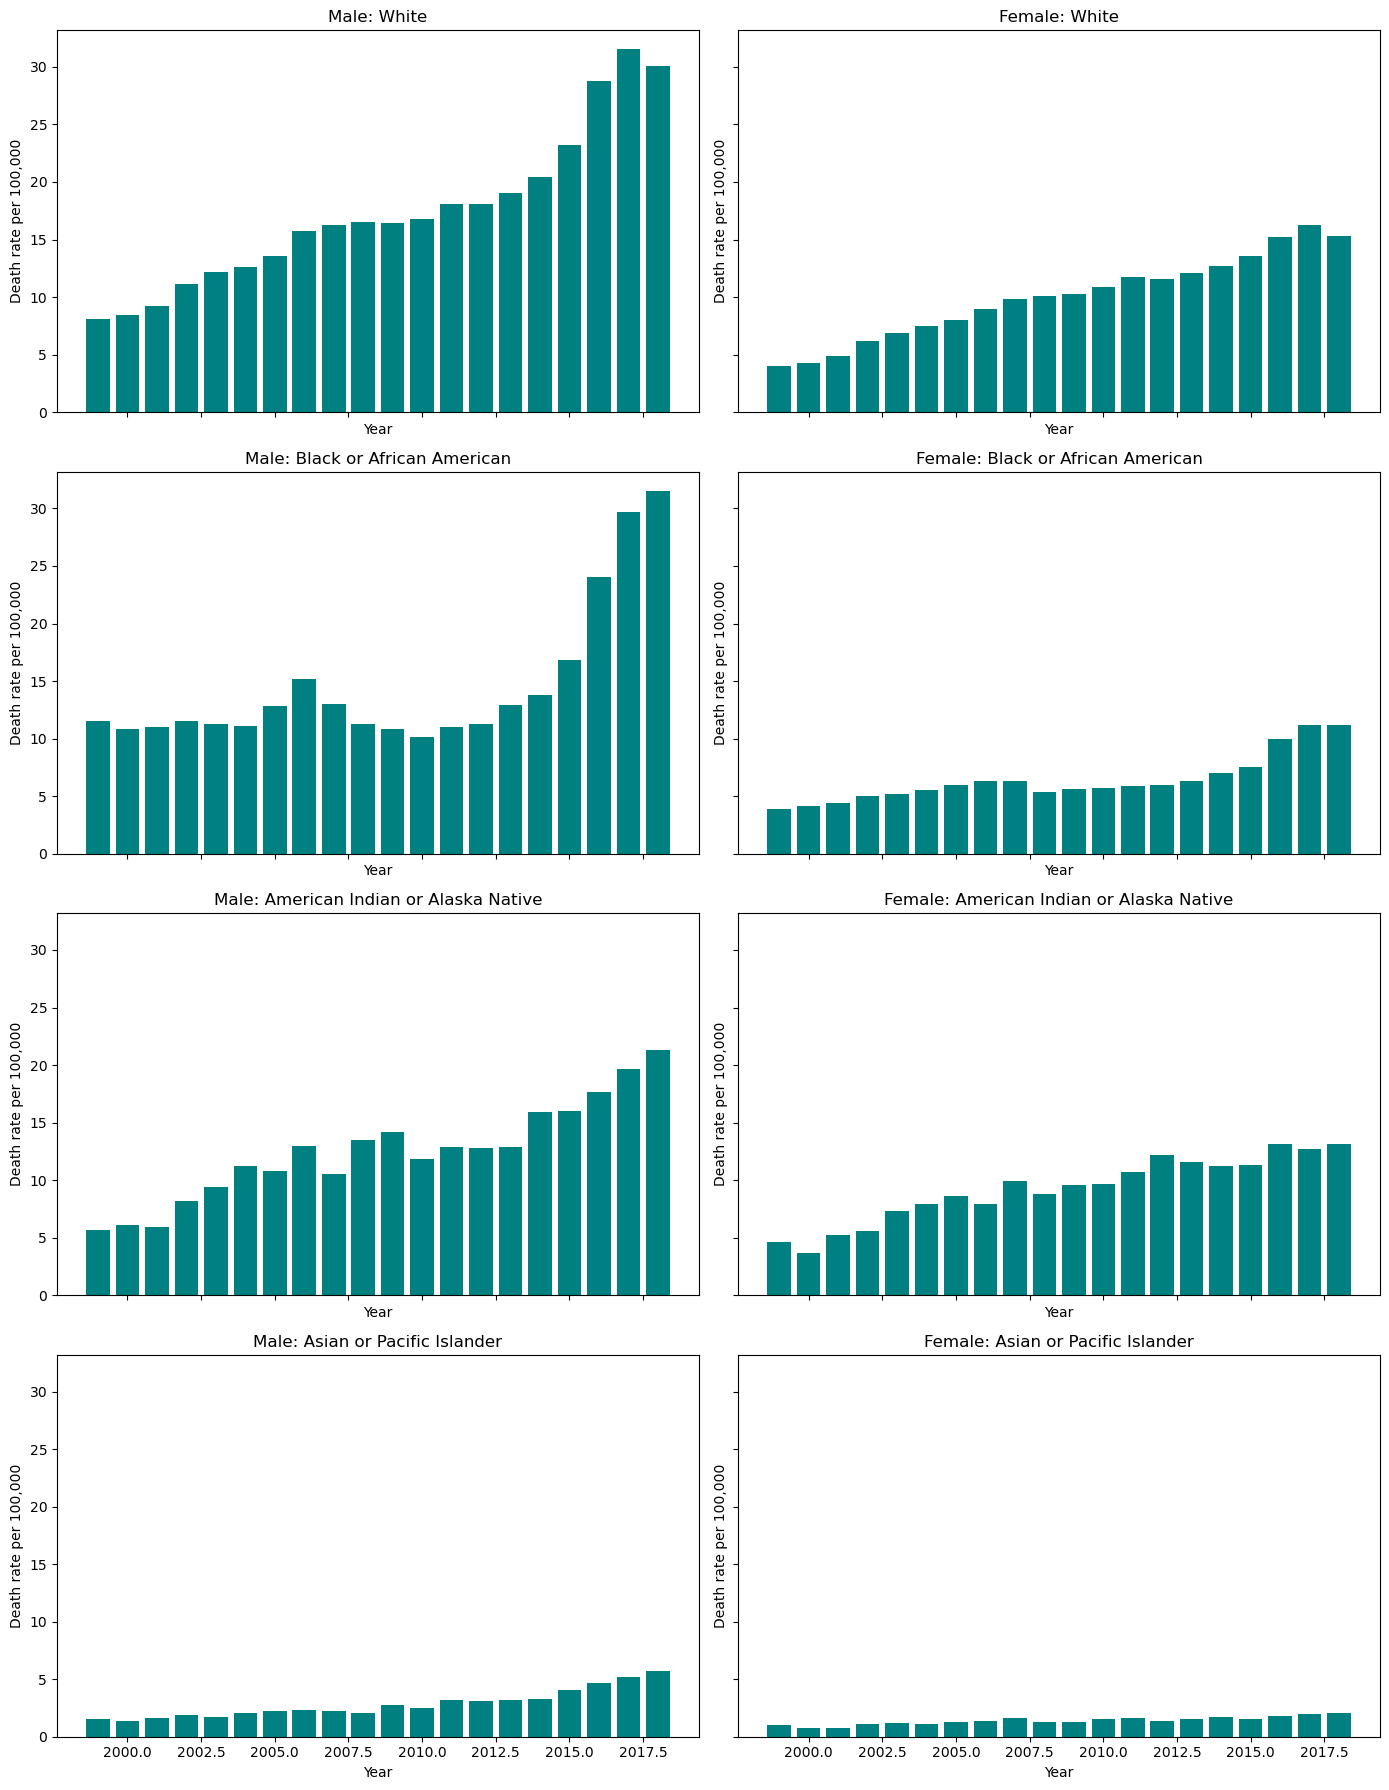

In [79]:
#print out the unique races in the dataset 
print('The races in the dataset are:', data['STUB_LABEL'].unique())

# Create a list of race categories from the unique values in the 'STUB_LABEL' column
groups = [
    "Male: White", "Female: White",
    "Male: Black or African American", "Female: Black or African American",
    "Male: American Indian or Alaska Native", "Female: American Indian or Alaska Native",
    "Male: Asian or Pacific Islander", "Female: Asian or Pacific Islander"
]

# cleans the dataframe to only include the specified race categories
cleaned_data = data[data['STUB_LABEL'].isin(groups)]

#Allows for proper polotting of the data to look more readable 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18), sharex=True, sharey=True)
axes = axes.ravel()

#Plots the data as a bar graph
for i, group in enumerate(groups):
    ax = axes[i]
    group_data = cleaned_data[cleaned_data['STUB_LABEL'] == group]
    ax.bar(group_data['YEAR'], group_data['ESTIMATE'], color='teal')
    ax.set_title(group)
    ax.set_xlabel('Year')
    ax.set_ylabel('Death rate per 100,000')

plt.tight_layout()
plt.show()

In these graphs, each one represents the gender along with the racial group that was taken in the dataset. Overall, one can conclude that men are more likley to fall victim to overodsing as drug abuse victims. This can be exaplined by how men tend to have wrose mental health compared to women. Also, two races lead when it comes to men or women increasinging significantly in deaths. It is whites and blacks, where there is an sharp increase in deaths. Asian men and women are the least likley to die from drug overdosing. 

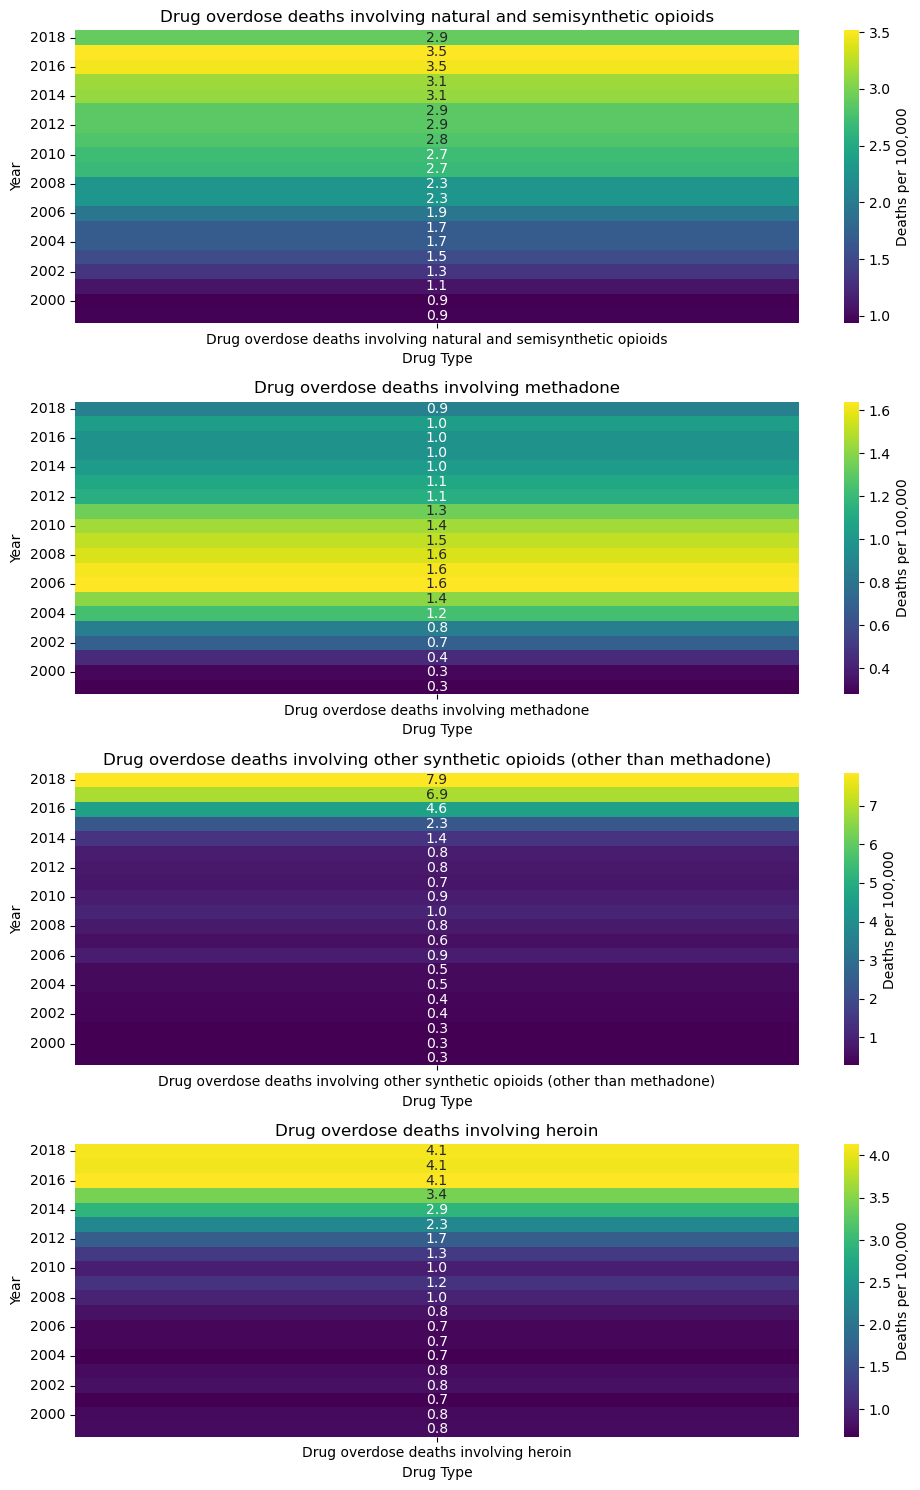

In [80]:
#Code below create 4 different hatmaps for specific drug types death rates per 100,000 people

# Filter the data for specific drug types
specific_drug_types = [
    'Drug overdose deaths involving natural and semisynthetic opioids',
    'Drug overdose deaths involving methadone',
    'Drug overdose deaths involving other synthetic opioids (other than methadone)',
    'Drug overdose deaths involving heroin'
]

# Further filter the data for "All ages"
all_ages_data = data[data['AGE'] == 'All ages']
specific_drugs_data = all_ages_data[all_ages_data['PANEL'].isin(specific_drug_types)]

# Aggregate the data to avoid duplicates and prepare for heatmap
aggregated_data = specific_drugs_data.groupby(['PANEL', 'YEAR']).agg({'ESTIMATE': 'mean'}).reset_index()

# Create the heatmaps for the specific drug types
fig, axes = plt.subplots(nrows=len(specific_drug_types), ncols=1, figsize=(10, 15))

#Code below created in collaboration with Chatgpt
#Version: Chatgpt4
#Date accessed: April 12th, 2024
#prompt: How can I loop through a list of drug types and create a heatmap for each one?
for i, drug in enumerate(specific_drug_types):
    # Extract data for this specific drug type
    drug_data = aggregated_data[aggregated_data['PANEL'] == drug]
    
    # Creates the pivot table for heatmap
    heatmap_data = drug_data.pivot_table(index='YEAR', columns='PANEL', values='ESTIMATE', aggfunc='mean')
    
    # Reverse the year order for the heatmap (most recent year at the top)
    heatmap_data = heatmap_data.iloc[::-1]
    
    # Create heatmap
    sns.heatmap(heatmap_data, ax=axes[i], cmap="viridis", annot=True, fmt=".1f", cbar_kws={'label': 'Deaths per 100,000'})
    axes[i].set_title(drug)
    axes[i].set_ylabel("Year")
    axes[i].set_xlabel("Drug Type")

plt.tight_layout()
plt.show()


In this dataset, one can conlude that the most dangerous drug of this timeline studieed is to be synthetic opioids. When one looks  at the highest peak at the right of the scales, synthetic opoids have the highest peak at 7.8 deaths per 100,000 people. That means synthetic opiods, such as fentnyl, have been proven to be mixed with other subtances such as alcohol. Overall, this dataset shows how lethal anuy type of drug is, but everyone should be even more cautious about fentanyl. 

## Discussion and Conclusion

   Overall, I would conclude that the "War on drugs" approach to solving America's problem of drug overdoses has severley failed in all aspects. From our data, we can see there has been a sharp increase in the number of people dying from drug overdoses. Specifcally, we see a __250 percent increase in the death rate per 100,000 people over the past two decades (1999-2018).__ In 1999, __6.1 people out of 100,000 people__ would die from a drug realted overdose. In 2018, __Nearly 21.4 people__ died. These stats should be a lot more than arlarming to law makers and the govnerment that there cant be any time wated in taking action. 
      
   One of the drugs that has severely impacted our nation has been a rise in synthetic opiods such as fentley. Fentyl has made up __over 7 deaths per 100,000 people__ compared to the other drugs which have made __south of 5 people per 100,000 dead__. It is clear that the government needs to take action steps at adressing the impacts that synthetic opiods such as fentnyl have had on peoples lives.
   
   Even though my model can't be used or trusted to predict or estimate the future death rate numbers, we can still come to the conclusion the rate will increase. If we pretend that the model is good to use, around 2030, we will see the death rate be around __42 people per 100,000 people__ and around 2035, __70 people per 100,000 people__. Overall, despite the inaccurate predicitons of the actual values from my model, we can still condlcude there is going to be an exponential increase in the death rate if nothing is done about it.
   
   Its easy to see the death rates from my persepctive as just numbers on a graph, but even 1 person dead from an drugs is more than what is needed to justify the need for the government to take swift actions at actually helping people instead of imprisoning and punsishing them. Eevry single life that was taken by drugs, ev ery single person that lost their lives to drugs had families, they had children, they had parents, spouses, loved ones, freinds, etc.  
   
   To conclude, what we can learn froom my results is that our current policies have been severley ineffective in solving this rising issue of people dying from drugs. This issue should be extremley alarming as well as worrying. Our public polices should be shifted towards more rehab facitlies and centers instead of imprisoning people for their problems and contributing to the cycle. 
   
   Some obstacles I ran into was not choosing what types of graphs and visualizations I should preform in order to answer my question. My dataset was extremley rich when it came to data, and so I was having an particualry hard time of whether I should plot out eveyrthing such as gender and what types of drugs each gender used, or just do race. Another obstacle I faced was when it came to curve_fitting and creating a model that sufficitley worked, my model kept on giving preidicted values that were not even close enoguh to the actual values. Even when I constuled online sources and chatgpt, the code and the curve_fitting model kept giving values that were way lower then they are supposed to be. Therefore, I couldnt use my model I created to predict or even estimate the future drug death rates. 
   
   Overall, I do feel pretty confident that the graphs I have made do accruatley asnwer my question of how effective our countries current drug policies are, and what drugs have devested our communties over the last 2 decades. I do feel like this project has defintley and can help educate our society in how bad our drug problem has gotten in our country.  
    

### References

1. “War on Drugs.” Wikipedia, Wikimedia Foundation, 12 Apr. 2024, en.wikipedia.org/wiki/War_on_drugs. 

2. “War on Drugs - Timeline in America, Definition & Facts.” History.Com, A&E Television Networks, www.history.com/topics/crime/the-war-on-drugs. Accessed 14 Apr. 2024. 

3. “U.S. Department of Health & Human Services - Drug Overdose Death Rates, by Drug Type, Sex, Age, Race, and Hispanic Origin: United States.” Catalog, Publisher Centers for Disease Control and Prevention, 29 Apr. 2022, catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f#sec-dates. 